In [2]:
!pip install torchsummary

In [3]:
!pip install gdown


In [15]:
!gdown --id 1bWNDSlJyaW3DmYk6HgTnvWEKfWfp4n1R


/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bWNDSlJyaW3DmYk6HgTnvWEKfWfp4n1R
To: /kaggle/working/query.zip
100%|███████████████████████████████████████| 2.79M/2.79M [00:00<00:00, 185MB/s]


In [16]:
import zipfile
import os

In [18]:
# ZIP 파일 경로 (예: 'uploaded_file.zip')
zip_file_path = '/kaggle/working/query.zip'

# 추출할 디렉토리 경로
extract_dir = '/kaggle/working/'

# 디렉토리 생성
os.makedirs(extract_dir, exist_ok=True)

# ZIP 파일 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"ZIP 파일이 성공적으로 {extract_dir} 디렉토리로 해제되었습니다.")

ZIP 파일이 성공적으로 /kaggle/working/ 디렉토리로 해제되었습니다.


In [19]:
import warnings
warnings. filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
import os
import copy
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
print ("PyTorch Version: ",torch.__version__)
print ("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  2.1.2
Torchvision Version:  0.16.2


In [20]:
data_dir = '/kaggle/working/recaptcha-dataset/Large'
# preprocessed_data = '/content/recaptcha/preprocessed/'
#전처리 사진으로 하니까 더 이상해지네..
class_names =  ['Bicycle', 'Bridge','Bus','Car',
                'Chimney','Crossralk', 'Hydrant',
                'Motorcycle','Palm', 'Traffic Light ']
input_size = 224
# input_size = 299
# batch_size = 32
batch_size = 8

# Data auguentation and normalization for training
#Just normalization for validation
data_transforms = transforms. Compose([
                    transforms. ToTensor(),
                    transforms. RandomResizedCrop(input_size),
                    transforms. RandomHorizontalFlip(),
                    transforms. Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225] )
])

print("Initializing Datasets and Dataloaders...")
#데이터 개수만큼 인덱스를 만든다.
image_datasets = datasets.ImageFolder(data_dir, data_transforms) # your dataset
num_data = len(image_datasets)
indices = np.arange(num_data)
np. random.shuffle(indices)

train_size = int(num_data*0.8)
train_indices = indices[:train_size]
val_indices = indices[train_size:]
train_set = torch.utils.data.Subset (image_datasets, train_indices)
val_set = torch.utils.data.Subset (image_datasets, val_indices)
print ('Number of training data:', len(train_set))
print ('Number of validation data:' , len(val_set))
dataloaders = { 'train': torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4),
               'val': torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=4)}

Initializing Datasets and Dataloaders...
Number of training data: 8685
Number of validation data: 2172


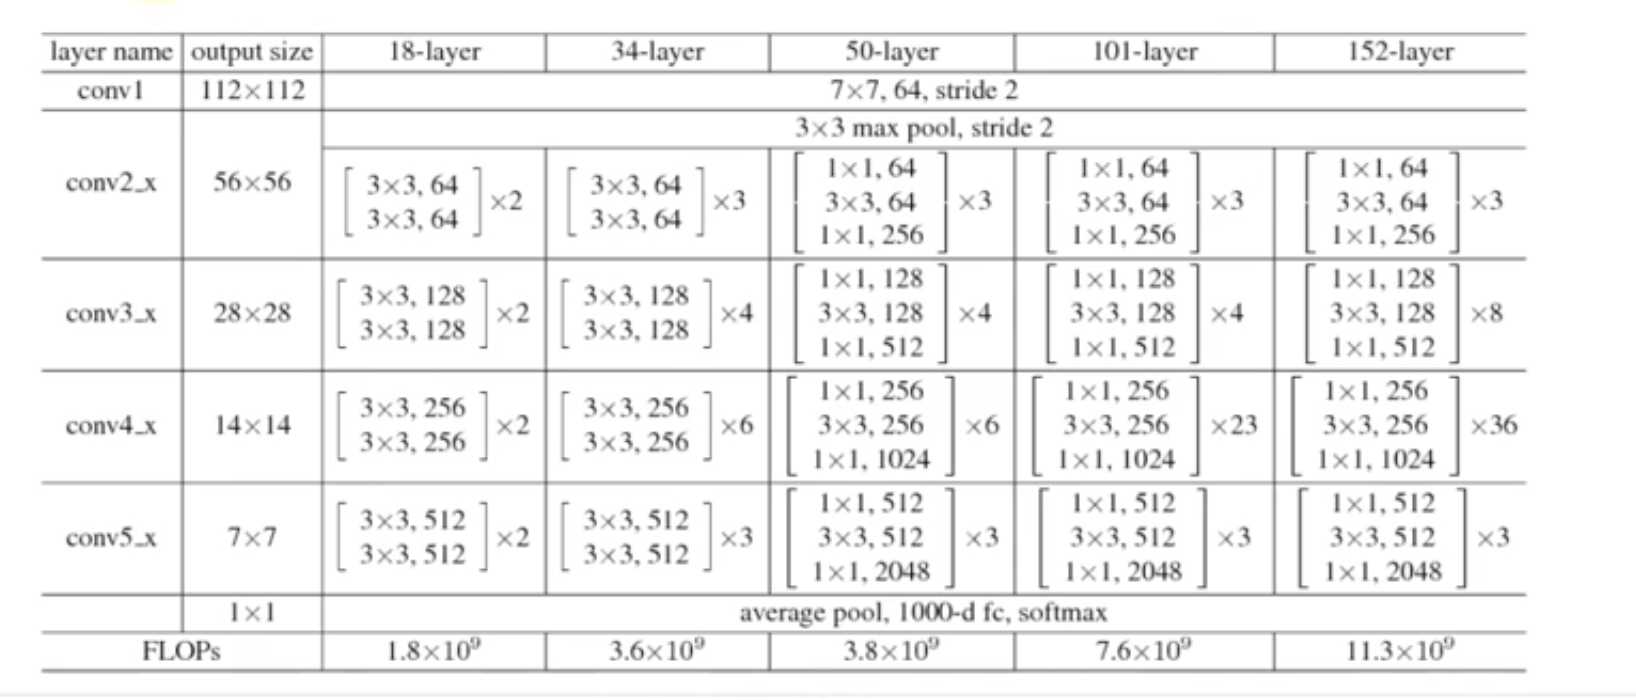

In [90]:

#각 레이어마다 파라미터가 몇개가 있는지 계산할 줄 알아야함 7x7 convolution시  output과 파라미터 개수 알아야함

In [ ]:
#zoo

In [9]:
# import torch.nn as nn
# from torchvision import models
# import timm  

# def set_parameter_requires_grad(model, feature_extracting):
#     if feature_extracting:
#         for param in model.parameters():
#             param.requires_grad = False

# def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
#   #initialize these variables which will be set in this if statement Each of these
#   #variables is model specific
#   model_ft = None
#   input_size = 0
#   if model_name == "resnet":
#     """ Resnet18
#     """
#     model_ft = models.resnet18(pretrained=use_pretrained)
#     set_parameter_requires_grad(model_ft, feature_extract)
#     num_ftrs = model_ft.fc.in_features
#     model_ft.fc = nn.Linear(num_ftrs, num_classes)
#     input_size = 224
#   elif model_name == "alexnet":
#     """ Alexnet
#     """
#     model_ft = models.alexnet(pretrained=use_pretrained)
#     set_parameter_requires_grad(model_ft, feature_extract)
#     num_ftrs = model_ft.classifier[6].in_features
#     model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
#     input_size = 224
#   elif model_name == "vgg":
#     """ VGG11_bn
#     """
#     model_ft = models.vgg11_bn(pretrained=use_pretrained)
#     set_parameter_requires_grad(model_ft, feature_extract)
#     num_ftrs = model_ft.classifier[6].in_features
#     model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
#     input_size = 224
#   elif model_name == "squeezenet":
#     """ Squeezenet
#     """
#     model_ft = models.squeezenet1_0(pretrained=use_pretrained)
#     set_parameter_requires_grad(model_ft, feature_extract)
#     model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
#     model_ft.num_classes = num_classes
#     input_size = 224
#   elif model_name == "inception":
#         model_ft = models.inception_v4(pretrained=use_pretrained)
#         set_parameter_requires_grad(model_ft, feature_extract)
#         num_ftrs = model_ft.fc.in_features
#         model_ft.fc = nn.Linear(num_ftrs, num_classes)
#         input_size = 299

#   elif model_name == "densenet":
#         model_ft = models.densenet201(pretrained=use_pretrained)
#         set_parameter_requires_grad(model_ft, feature_extract)
#         num_ftrs = model_ft.classifier.in_features
#         model_ft.classifier = nn.Linear(num_ftrs, num_classes)
#         input_size = 224

#   elif model_name == "efficientnet":
#         available_models = timm.list_models()
#         if 'efficientnetv2_l' in available_models:
#             model_ft = timm.create_model('efficientnetv2_l', pretrained=False, num_classes=num_classes)
# #             model_ft = timm.create_model('efficientnetv2_l', pretrained=use_pretrained, num_classes=num_classes)
            
#         else:
#             print(f"'efficientnetv2_s' model not available. Available models are: {available_models}")
#             exit()
#         set_parameter_requires_grad(model_ft, feature_extract)
#         input_size = 224
#     elif model_name == "nasnet":
#         """ NASNet """
#         model_ft = timm.create_model('nasnetalarge', pretrained=use_pretrained, num_classes=num_classes)
#         set_parameter_requires_grad(model_ft, feature_extract)
#         num_ftrs = model_ft.get_classifier().in_features
#         model_ft.classifier = nn.Linear(num_ftrs, num_classes)
#         input_size = 331
#   elif model_name == "regnet":
#         #040,064도 해보기
#         model_ft = timm.create_model('regnetx_032', pretrained=use_pretrained, num_classes=num_classes)
#         set_parameter_requires_grad(model_ft, feature_extract)
#         input_size = 224

#   elif model_name == "convnext":
#       available_models = timm.list_models()
#       if 'convnext_base' in available_models:
#         model_ft = timm.create_model('convnext_base', pretrained=use_pretrained, num_classes=num_classes)
#         set_parameter_requires_grad(model_ft, feature_extract)
#         input_size = 224

#   elif model_name == "nfnet":
#         model_ft = timm.create_model('nfnet_f0', pretrained=use_pretrained, num_classes=num_classes)
#         set_parameter_requires_grad(model_ft, feature_extract)
#         input_size = 224
#   else:
#     print("Invalid model name, exiting...")
#     exit()
#   return model_ft, input_size

In [20]:
# available_models = timm.list_models()
# print(available_models)

In [12]:
# #Models to choose from [ resnet,alexnet,vgg,sqeezenet,densenet, inception]
# # model_name = "resnet"
# model_name = "nasnet"
# num_classes = 10
# num_epochs = 15
# feature_extract = False


# model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# # summary(model_ft, (3,224,224), device='cpu')
# # summary(model_ft, (3,299,299), device='cpu')
# # 출력 층 개수, 파라미터 개수 등등

model.safetensors:   0%|          | 0.00/356M [00:00<?, ?B/s]

### train model



In [10]:
# def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
#   since = time.time()
#   val_acc_history = []

#   best_model_wts = copy.deepcopy(model.state_dict())
#   best_acc = 0.0
#   model = model.to(device)
#   for epoch in range(num_epochs):
#     print('Epoch {}/{}'.format(epoch, num_epochs - 1))
#     print('-' * 10)

#     #Each epoch has a training and validataion phase
#     for phase in ['train', 'val']:
#       if phase == 'train':
#         model.train()
#       else:
#         model.eval()

#       running_loss = 0.0
#       running_corrects = 0

#       #iterate over data
#       for inputs, labels in dataloaders[phase]:
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         #zero the parameter gradients
#         optimizer.zero_grad()

#         #forward
#         #track history if only in train
#         with torch.set_grad_enabled(phase == 'train'):
#           outputs = model(inputs)
#           _, preds = torch.max(outputs, 1)
#           loss = criterion(outputs, labels)

#           #backward + optimize only if in training phase
#           if phase == 'train':
#             loss.backward()
#             optimizer.step()

#         #statistics
#         running_loss += loss.item() * inputs.size(0)
#         running_corrects += torch.sum(preds == labels.data)
#       epoch_loss = running_loss / len(dataloaders[phase].dataset)
#       epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

#       print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
#       #deep copy the model
#       if phase == 'val' and epoch_acc > best_acc:
#         best_acc = epoch_acc
#         best_model_wts = copy.deepcopy(model.state_dict())
#       if phase == 'val':
#         val_acc_history.append(epoch_acc)

#     print()

#   time_elapsed = time.time() - since
#   print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
#   print('Best val Acc: {:4f}'.format(best_acc))

#   #load best model weights
#   model.load_state_dict(best_model_wts)
#   return model, val_acc_history


In [45]:
# #detect if we have GPU
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# # # DataParallel 사용
# # if torch.cuda.device_count() > 1:
# #     print("Using", torch.cuda.device_count(), "GPUs!")
# #     model_ft = nn.DataParallel(model_ft)

# # model_ft.eval()

In [21]:
# params_to_update = model_ft.parameters()
# print("Params to learn:")
# if feature_extract:
#   params_to_update = []
#   for name,param in model_ft.named_parameters():
#     if param.requires_grad == True:
#       params_to_update.append(param)
# #       print("\t",name)
# else:
#   for name,param in model_ft.named_parameters():
#     if param.requires_grad == True:
#       print("\t",name)

# #observe that all parameters are being optimized
# optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

In [22]:
# #Setup the loss fxn
# criterion = nn.CrossEntropyLoss()
# #Train and evaluateq
# model_ft, hist = train_model(model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs)

##save model &features

In [ ]:
#torch.save(model_ft.state_dict(),'resnet18.pt')

In [23]:
# torch.save(model_ft, 'convNeXt.pt')
# # torch.save(model_ft, 'squeezenet.pt')

* convNext이렇게 바꿔줘야한다.

In [24]:
model_feature = torch.load('/kaggle/working/convNeXt.pt')
#마지막 레이어를 뺴고 모든 레이어를 하나의 모듈로 만듦 -> 하나의 특징을 추출하는 모델로 만든다.
modules = list(model_feature.children())[:-1]
model_feat = nn.Sequential(*modules)
for p in model_feat.parameters():
  p.requires_grad = False
# # 주어지는 test 데이터 에서는 label이 없다.
# for inputs,labels in dataloaders['val']:
#   inputs= inputs.to(device)
#   h  = resnet18_feat(inputs)
#   # print(h.shape)
#   '''
#   code:
#   [32,512,1,1] 512차원에 label을 각각 대응 시킨다.
#   각각 대응 시켜서 저장
#   save the (features,labels)
    # '''
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_feat = model_feat.to(device)

# Function to extract features
def extract_features(dataloader,data):
    features_list = []
    labels_list = []
    for inputs, labels in dataloaders[data]:
        inputs = inputs.to(device)
        h = model_feat(inputs)
#         h = h.view(h.size(0), -1)

        #convnext
        h = h.reshape(h.size(0), -1)  # Flatten the features [32, 512, 1, 1] -> [32, 512]

        features_list.append(h.cpu().detach())
        labels_list.append(labels.cpu().detach())

    features = torch.cat(features_list, 0)
    labels = torch.cat(labels_list, 0)
    return features, labels



In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# train_features, train_labels = extract_features(dataloaders['train'],'train')
# # Extract features and labels
# val_features, val_labels = extract_features(dataloaders['val'],'val')
# print(train_features.shape,val_features.shape)



torch.Size([8685, 50176]) torch.Size([2172, 50176])


In [80]:
# # # Save the extracted features and labels
# torch.save((train_features,train_labels), 'convNext_train_features_labels.pth')
# torch.save((val_features,val_labels), 'convNext_val_features_labels.pth')

In [25]:
#학습데이터 특징 추출 해놓은 것 다시 load
train_features, train_labels = torch.load('/kaggle/working/convNext_train_features_labels.pth')
val_features, val_labels = torch.load('/kaggle/working/convNext_val_features_labels.pth')

In [26]:
print(train_features.shape,val_features.shape)

torch.Size([8685, 50176]) torch.Size([2172, 50176])


In [27]:
# PCA를 사용한 차원 축소
n_components = 100  # 원하는 차원 수로 조정
pca = PCA(n_components=n_components)
train_features_pca = pca.fit_transform(train_features)
val_features_pca = pca.transform(val_features)

###KNN

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_distances

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=7,metric='cosine')

# Train the classifier
knn.fit(train_features, train_labels)

# Predict on validation set
val_predictions = knn.predict(val_features)

# Calculate accuracy
accuracy = accuracy_score(val_labels, val_predictions)
print(f'Val Accuracy with KNN: {accuracy * 100}%')




# 새로운 특징을 사용하여 모델 훈련 및 평가
knn_pca = KNeighborsClassifier(n_neighbors=7,metric='cosine')
knn_pca.fit(train_features_pca, train_labels)

# 검증 세트에서 예측
val_predictions_pca = knn_pca.predict(val_features_pca)

# 정확도 계산
knn_accuracy_pca= accuracy_score(val_labels, val_predictions_pca)
print(f'Val knn Accuracy with PCA: {knn_accuracy_pca * 100}%')


Val Accuracy with KNN: 85.91160220994475%
Val knn Accuracy with PCA: 86.1878453038674%


###RanomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier


# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(train_features, train_labels)

# Predict on validation set
val_predictions_rf = rf.predict(val_features)

# Calculate accuracy
accuracy_rf = accuracy_score(val_labels, val_predictions_rf)
print(f'Val RF Accuracy : {accuracy_rf * 100}%')

# 새로운 특징을 사용하여 모델 훈련 및 평가
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(train_features_pca, train_labels)

# 검증 세트에서 예측
val_predictions_pca = rf_pca.predict(val_features_pca)

# 정확도 계산
rf_accuracy_pca= accuracy_score(val_labels, val_predictions_pca)
print(f'Val RF Accuracy with PCA: {rf_accuracy_pca * 100}%')


Val RF Accuracy : 75.9208103130755%
Val RF Accuracy with PCA: 85.77348066298343%


In [137]:
# joblib.dump(rf_pca, 'rf_pca_96%(convNeXt).joblib')

# # 모델 불러오기
# model = joblib.load('/kaggle/working/rf_pca_96%(convNeXt).joblib')
# y_pred = model.predict(val_features_pca)

# # 정확도 계산
# model_acc= accuracy_score(val_labels, y_pred)
# print(f'Val RF Accuracy with PCA: {model_acc * 100}%')


# import pickle
# # KMeans 객체를 파일에서 로드
# with open('/gdrive/MyDrive/kmeans_model.pkl', 'rb') as file:
#     kmeans = pickle.load(file)


Val RF Accuracy with PCA: 85.35911602209944%


In [14]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
# voting_clf = VotingClassifier(estimators=[
#     ('knn', knn),
#     ('rf', rf),
#     ('svm', svm)],
#     voting='soft')  # soft voting for probabilities
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('rf', rf)],
    voting='soft')  # soft voting for probabilities

# Train the voting classifier
voting_clf.fit(train_features, train_labels)

voting_pca_clf = VotingClassifier(estimators=[
    ('knn_pca', knn_pca),
    ('rf_pca', rf_pca)],
    voting='soft')

voting_pca_clf.fit(train_features_pca, train_labels)

VotingClassifier(estimators=[('knn_pca',
                              KNeighborsClassifier(metric='cosine',
                                                   n_neighbors=7)),
                             ('rf_pca',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [150]:
# joblib.dump(voting_clf, 'voting_clf_97%(convNeXt).joblib')
# # model = joblib.load('/kaggle/working/rf_pca_96%(convNeXt).joblib')
# # y_pred = model.predict(val_features_pca)

['voting_clf_97%(convNeXt).joblib']

----------------------------------------
TEST data load

----------------------------------------------

In [145]:
# #확인용 test 데이터
# test_data_dir = '/kaggle/working/test data2'

# class_names =  ['Bicycle', 'Bridge','Bus','Car',
#                 'Chimney','Crossralk', 'Hydrant',
#                 'Motorcycle','Palm', 'Traffic Light ']
# input_size = 224
# batch_size = 32
# test_transforms = transforms.Compose([
#     transforms.Resize((input_size, input_size)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])


# # Load the test dataset
# test_dataset = datasets.ImageFolder(test_data_dir, test_transforms)
# # Create the DataLoader
# test_dataloader =torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# # Print number of test samples
# print('Number of test samples:', len(test_dataset))

Number of test samples: 100


In [146]:
# # Extract features for test data
# def extract_test_features(dataloader):
#     test_features_list = []
#     test_label_list = []

#     for inputs ,label in dataloader:
#         inputs = inputs.to(device)
#         h = model_feat(inputs)
# #         h = h.view(h.size(0), -1)
#         #convnext
#         h = h.reshape(h.size(0), -1)

#         test_features_list.append(h.cpu().detach())
#         test_label_list.append(label.cpu().detach())

#     test_features = torch.cat(test_features_list, 0)
#     test_labels = torch.cat(test_label_list, 0)
#     return test_features,test_labels

# # Load test features
# test_features,test_labels = extract_test_features(test_dataloader)


# # # Predict on test set using voting classifier
# # test_predictions = voting_clf.predict(test_features)
# # #print('Correct label:', test_labels,'\n','Test Predictions with Voting Classifier:', test_predictions)
# # acc = accuracy_score(test_labels, test_predictions)
# # print(f'Test acc: {acc * 100}%')




-----------------------------------

#  label이 없는 test data

In [40]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class UnlabeledImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        # 파일 이름을 정렬하여 이미지 경로 설정
        self.image_paths = sorted([os.path.join(root_dir, fname) for fname in os.listdir(root_dir) if fname.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# 경로 및 하이퍼파라미터 설정
no_label_test_data_dir = '/kaggle/working/query'
input_size = 224
batch_size = 32

# 데이터 변환 정의
test_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 커스텀 데이터셋 로드
no_label_test_dataset = UnlabeledImageDataset(no_label_test_data_dir, transform=test_transforms)
no_label_test_dataloader = DataLoader(no_label_test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 테스트 데이터셋의 이미지 수 출력
print('Number of test samples:', len(no_label_test_dataset))

# 정렬된 이미지 경로 확인 (선택사항)
for img_path in no_label_test_dataset.image_paths:
    print(img_path)


Number of test samples: 100
/kaggle/working/query/query001.png
/kaggle/working/query/query002.png
/kaggle/working/query/query003.png
/kaggle/working/query/query004.png
/kaggle/working/query/query005.png
/kaggle/working/query/query006.png
/kaggle/working/query/query007.png
/kaggle/working/query/query008.png
/kaggle/working/query/query009.png
/kaggle/working/query/query010.png
/kaggle/working/query/query011.png
/kaggle/working/query/query012.png
/kaggle/working/query/query013.png
/kaggle/working/query/query014.png
/kaggle/working/query/query015.png
/kaggle/working/query/query016.png
/kaggle/working/query/query017.png
/kaggle/working/query/query018.png
/kaggle/working/query/query019.png
/kaggle/working/query/query020.png
/kaggle/working/query/query021.png
/kaggle/working/query/query022.png
/kaggle/working/query/query023.png
/kaggle/working/query/query024.png
/kaggle/working/query/query025.png
/kaggle/working/query/query026.png
/kaggle/working/query/query027.png
/kaggle/working/query/query

In [41]:
# Extract features for test data
def extract_test_features(dataloader):
    test_features_list = []

    for inputs  in dataloader:
        inputs = inputs.to(device)
        h = model_feat(inputs)
#         h = h.view(h.size(0), -1)
        #convnext
        h = h.reshape(h.size(0), -1)

        test_features_list.append(h.cpu().detach())

    test_features = torch.cat(test_features_list, 0)
    return test_features

# Load test features
no_label_test_features = extract_test_features(no_label_test_dataloader)


In [42]:
# no_label_test_features_pca = pca.transform(no_label_test_features)
# no_label_predictions =rf_pca.predict(no_label_test_features_pca)
no_label_predictions = voting_clf.predict(no_label_test_features)
print(no_label_predictions)

[2 6 0 5 0 9 6 1 7 1 5 2 7 3 7 1 4 8 0 0 4 7 1 5 5 4 4 6 8 8 3 5 9 0 9 5 5
 8 3 2 8 1 4 0 3 6 7 1 2 9 8 3 6 9 4 6 6 1 8 0 9 9 6 7 7 5 3 4 6 4 7 1 0 2
 9 1 9 0 2 5 3 2 1 3 7 8 2 2 7 3 4 4 8 9 3 0 6 5 8 2]


-----------------------------------------------
test

In [100]:
# import joblib
# # 모델 저장 경로
# model_save_path = "/kaggle/working/"

# # 랜덤 포레스트 모델 저장
# joblib.dump(knn, model_save_path + 'knn(InceptionV4)_test1_93%.pkl')

# print(" model has been saved.")


 model has been saved.


In [152]:
# accuracies = {
#     'KNN': test_accuracy_knn,
#     'Random Forest': test_accuracy_rf,
#     'Voting Classifier': test_accuracy_voting,
#     'KNN_pca': test_accuracy_knn_pca,
#     'Random Forest_pca': test_accuracy_rf_pca,
#     'Voting Classifier_pca': test_accuracy_voting_pca
# }
# best_classifier_name = max(accuracies, key=accuracies.get)

# # Predict on test set using the best classifier
# if best_classifier_name == 'KNN':
#     best_classifier = knn
# elif best_classifier_name == 'Random Forest':
#     best_classifier = rf
# elif best_classifier_name == 'KNN_pca':
#     best_classifier = knn_pca
# elif best_classifier_name == 'Random Forest_pca':
#     best_classifier = rf_pca
# elif best_classifier_name == 'Voting Classifier_pca':
#     best_classifier = voting_clf_pca
# else:
#     best_classifier = voting_clf



### Task 1: Classification

In [33]:
# print(best_classifier_name)

In [154]:
# test_dir= '/kaggle/working/test data'
# new_image_paths = [os.path.join(test_dir, img_name) for img_name in os.listdir(test_dir) if img_name.endswith(('.png', '.jpg', '.jpeg'))]


# def load_new_data(image_paths):
#     labels = []
#     for image_path in image_paths:
#         file_name = os.path.basename(image_path)
#         label = file_name.split('-')[0]
#         # 특징과 레이블 저장
#         labels.append(label)
#     return np.array(labels)
# correct_labels = load_new_data(new_image_paths)

In [43]:
# test_predictions = best_classifier.predict(test_features_pca)
# class_to_idx = test_dataset.class_to_idx
# idx_to_class = {v: k for k, v in class_to_idx.items()}

# testlabels = [idx_to_class[label] for label in test_labels.numpy()]
# # Convert numeric labels to original class labels
# predict_labels = [idx_to_class[label] for label in test_predictions]
# # print('원래 레이블:',testlabels)
# # Print the predicted labels
# print('예측 레이블:',predict_labels)
# accuracy = accuracy_score(testlabels, predict_labels)
# print(f'Accuracy: {accuracy * 100}%')
class_to_idx = image_datasets.class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}
# Convert numeric labels to original class labels
predict_labels = [idx_to_class[label] for label in no_label_predictions]
print(predict_labels)

['Bus', 'Hydrant', 'Bicycle', 'Crosswalk', 'Bicycle', 'Traffic Light', 'Hydrant', 'Bridge', 'Motorcycle', 'Bridge', 'Crosswalk', 'Bus', 'Motorcycle', 'Car', 'Motorcycle', 'Bridge', 'Chimney', 'Palm', 'Bicycle', 'Bicycle', 'Chimney', 'Motorcycle', 'Bridge', 'Crosswalk', 'Crosswalk', 'Chimney', 'Chimney', 'Hydrant', 'Palm', 'Palm', 'Car', 'Crosswalk', 'Traffic Light', 'Bicycle', 'Traffic Light', 'Crosswalk', 'Crosswalk', 'Palm', 'Car', 'Bus', 'Palm', 'Bridge', 'Chimney', 'Bicycle', 'Car', 'Hydrant', 'Motorcycle', 'Bridge', 'Bus', 'Traffic Light', 'Palm', 'Car', 'Hydrant', 'Traffic Light', 'Chimney', 'Hydrant', 'Hydrant', 'Bridge', 'Palm', 'Bicycle', 'Traffic Light', 'Traffic Light', 'Hydrant', 'Motorcycle', 'Motorcycle', 'Crosswalk', 'Car', 'Chimney', 'Hydrant', 'Chimney', 'Motorcycle', 'Bridge', 'Bicycle', 'Bus', 'Traffic Light', 'Bridge', 'Traffic Light', 'Bicycle', 'Bus', 'Crosswalk', 'Car', 'Bus', 'Bridge', 'Car', 'Motorcycle', 'Palm', 'Bus', 'Bus', 'Motorcycle', 'Car', 'Chimney', 'C

In [44]:
import csv
#csv저장
with open('c2_t1_a1.csv','w') as file :
    write = csv.writer(file)
    for i, predict_label in enumerate(predict_labels):
        write.writerow([f'query{i+1:03}.png', predict_label])

### Task 2: Retrieval

In [155]:
# neigh_ind = knn.kneighbors(X=test_features, n_neighbors=10, return_distance=False) # Top-10 results
# neigh_labels = np.array(train_labels)[neigh_ind]

# neigh_labels = [[idx_to_class[label] for label in neighbors] for neighbors in neigh_labels]
# print(neigh_labels[3] )

['Bicycle', 'Bicycle', 'Bicycle', 'Bicycle', 'Bicycle', 'Bicycle', 'Bicycle', 'Bicycle', 'Bicycle', 'Bicycle']


In [82]:
# neigh_ind_pca = knn_pca.kneighbors(X=no_label_test_features_pca, n_neighbors=10, return_distance=False) # Top-10 results
# neigh_labels_pca = np.array(train_labels)[neigh_ind_pca]

# neigh_labels_pca = [[idx_to_class[label] for label in neighbors] for neighbors in neigh_labels_pca]
# print(neigh_labels_pca[:5] )

[['Palm', 'Palm', 'Palm', 'Palm', 'Palm', 'Palm', 'Palm', 'Palm', 'Palm', 'Car'], ['Hydrant', 'Hydrant', 'Hydrant', 'Hydrant', 'Hydrant', 'Hydrant', 'Hydrant', 'Hydrant', 'Hydrant', 'Hydrant'], ['Traffic Light', 'Chimney', 'Palm', 'Crosswalk', 'Chimney', 'Chimney', 'Traffic Light', 'Car', 'Car', 'Chimney'], ['Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car'], ['Traffic Light', 'Traffic Light', 'Traffic Light', 'Traffic Light', 'Traffic Light', 'Traffic Light', 'Traffic Light', 'Traffic Light', 'Traffic Light', 'Traffic Light']]


['Bicycle', 'Bicycle', 'Motorcycle', 'Motorcycle', 'Bicycle', 'Motorcycle', 'Bicycle', 'Motorcycle', 'Motorcycle', 'Car']
['Bicycle', 'Bicycle', 'Bicycle', 'Motorcycle', 'Bicycle', 'Motorcycle', 'Motorcycle', 'Bicycle', 'Motorcycle', 'Bicycle']


In [ ]:
# import csv

# with open('c2_t2_a1.csv','w') as file :
#     write = csv.writer(file)
#     for i, neigh_label in enumerate(neigh_labels):
#         write.writerow([f'query{i+1:03}.png'] + list(neigh_label))

In [ ]:
# with open('c2_t2_a2.csv','w') as file :
#     write = csv.writer(file)
#     for i, neigh_label_pca in enumerate(neigh_labels_pca):
#         write.writerow([f'query{i+1:03}.png'] + list(neigh_label_pca))